In [1]:
from computing_modules import NetworkToEstimator
import os
import time
import yaml
import numpy as np
from matplotlib import pyplot as plt

batch_size = 8

list_of_all_model_paths = [

  "trained-models/deit-small-baseline-imagenet-1k-20240110-014420",    # 0
  "trained-models/deit-small-baseline-imagenet-1k-20240110-014420",    # 1

  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.5_fused_True_20240101-235238",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.7_fused_True_20240103-090826",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.9_fused_True_20240103-093438",
  
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.5_fused_True_20231227-041334",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.7_fused_True_20231228-182949",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.5_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.9_fused_True_20231230-020027",
  
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.5_fused_True_20240104-221135",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.7_fused_True_20240104-222250",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_16_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.9_fused_True_20240107-060343",
  
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.5_fused_True_20231231-113333",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.7_fused_True_20231231-121215",
  "trained-models/imagenet-1k_deit_drop_tokens_variant_i_small/epochs_11_blockPruningInfo_finalThreshold_0.7_blockSize_32_method_topK_tokenDropInfo_layerCount_3_layerType_default_keepRate_0.9_fused_True_20240101-221041",


]


mode_list = ['baseline'] + ['baseline'] + ['simprune' for i in range(12)] 

list_of_all_result_dicts = []

for i, path in enumerate(list_of_all_model_paths):
    
    if i == 0:                             # 0
        block_size_for_baseline = 16          
    elif i == 1:                           # 1
        block_size_for_baseline = 32      
    else:
        block_size_for_baseline = None
    
    
    current_network_estimator = NetworkToEstimator._get_network_estimator(context=mode_list[i],
                                                                          path_to_model=path,
                                                                          _batch_size=batch_size,
                                                                          block_size_for_baseline=block_size_for_baseline)
    
    list_of_all_result_dicts.append(current_network_estimator._compile_all_results())


timestr = time.strftime("%Y%m%d-%H%M%S")

core_out_dir = str("final_results") + str("/") + str("batch_size_") + str(batch_size) + str("_") + str(timestr)

if not os.path.exists(core_out_dir):
    os.mkdir(core_out_dir)

for result_dict in list_of_all_result_dicts:
    if result_dict['context'] == 'baseline':
        filename = str(result_dict['context']) + str("_") + str("block_size") + str("_") + str(result_dict['block_size']) + str(".yaml")
    else:
        filename = str("blockPruneDensity") + str("_") + str(result_dict['block_prune_density']) + str("_") + str("tokenKeepRate") + str("_") + str(result_dict['token_keep_rate']) + str("_") + str("blockSize") + str("_") + str(result_dict['block_size']) + str(".yaml")
    
    ovrl_file = os.path.join(core_out_dir, filename)

    
    with open(ovrl_file, 'w') as convert_file:
        convert_file.write(yaml.dump(result_dict))

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.


Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.


Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=66, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=66, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=66, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=66, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=67, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=67, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=61, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=61, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=60, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=60, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=61, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=61, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 50.00
deit.encoder.layer.0.output.dense, sparsity = 50.00
deit.encoder.layer.1.intermediate.dense, sparsity = 50.00
deit.encoder.layer.1.output.dense, sparsity = 50.00
deit.encoder.layer.2.intermediate.dense, sparsity = 50.00
deit.encoder.layer.2.output.dense, sparsity = 50.00
deit.encoder.layer.3.intermediate.dense, sparsity = 50.00
deit.encoder.layer.3.output.dense, sparsity = 50.00
deit.encoder.layer.4.intermediate.dense, sparsity = 50.00
deit.encoder.layer.4.output.dense, sparsity = 50.00
deit.encoder.layer.5.intermediate.dense, sparsity = 50.00
deit.encoder.layer.5.output.dense, sparsity = 50.00
deit.encoder.layer.6.intermediate.dense, sparsity = 50.00
deit.encoder.layer.6.output.dense, sparsity = 50.00
deit.encoder.layer.7.intermediate.dense, sparsity = 50.00
deit.encoder.layer.7.output.dense, sparsity = 50.00
deit.encoder.layer.8.intermediate.dense, sparsity = 50.00
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=71, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=70, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=70, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=68, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=68, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=68, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

Using the latest cached version of the module from /home/dhruv/.cache/huggingface/modules/datasets_modules/datasets/imagenet-1k/09dbb3153f1ac686bac1f40d24f307c383b383bc171f2df5d9e91c1ad57455b9 (last modified on Wed Dec 20 17:18:06 2023) since it couldn't be found locally at imagenet-1k., or remotely on the Hugging Face Hub.


removed heads 0, total_heads=68, percentage removed=0.0
deit.encoder.layer.0.intermediate.dense, sparsity = 29.95
deit.encoder.layer.0.output.dense, sparsity = 29.95
deit.encoder.layer.1.intermediate.dense, sparsity = 29.95
deit.encoder.layer.1.output.dense, sparsity = 29.95
deit.encoder.layer.2.intermediate.dense, sparsity = 29.95
deit.encoder.layer.2.output.dense, sparsity = 29.95
deit.encoder.layer.3.intermediate.dense, sparsity = 29.95
deit.encoder.layer.3.output.dense, sparsity = 29.95
deit.encoder.layer.4.intermediate.dense, sparsity = 29.95
deit.encoder.layer.4.output.dense, sparsity = 29.95
deit.encoder.layer.5.intermediate.dense, sparsity = 29.95
deit.encoder.layer.5.output.dense, sparsity = 29.95
deit.encoder.layer.6.intermediate.dense, sparsity = 29.95
deit.encoder.layer.6.output.dense, sparsity = 29.95
deit.encoder.layer.7.intermediate.dense, sparsity = 29.95
deit.encoder.layer.7.output.dense, sparsity = 29.95
deit.encoder.layer.8.intermediate.dense, sparsity = 29.95
deit.e

In [2]:
density = []
blocksize = []
keeprate = []

#fpga_latency = []
#gpu_latency = []
#cpu_latency = []

fpga_throughput = []
gpu_throughput = []
cpu_throughput = []


for result_dict in list_of_all_result_dicts:
    density.append(result_dict['block_prune_density'] if result_dict['context'] != 'baseline' else 1)
    blocksize.append(result_dict['block_size'])
    keeprate.append(result_dict['token_keep_rate'] if result_dict['context'] != 'baseline' else 1)
    fpga_throughput.append(result_dict['fpga']['throughput_imgs_per_sec'])
    gpu_throughput.append(result_dict['gpu']['throughput_imgs_per_sec'])
    cpu_throughput.append(result_dict['cpu']['throughput_imgs_per_sec'])

print(density)
print(blocksize)
print(keeprate)
print(fpga_throughput)
print(gpu_throughput)
print(cpu_throughput)

[1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
[16, 32, 16, 16, 16, 32, 32, 32, 16, 16, 16, 32, 32, 32]
[1, 1, 0.5, 0.7, 0.9, 0.5, 0.7, 0.9, 0.5, 0.7, 0.9, 0.5, 0.7, 0.9]
[313.00080128205127, 281.43011527377524, 1151.5563283778026, 855.1296376530681, 676.1096649876611, 616.7928007944291, 556.66889334224, 500.17089172133814, 877.0545001666404, 643.7201877088067, 511.942771624036, 470.33148963389397, 424.93880881153115, 386.02487029564355]
[1981.587518828685, 1502.8352658778576, 1290.1543169233842, 1267.7560387856606, 1262.8241807738787, 1267.2899206612194, 1265.0357088501535, 1254.8548064595598, 1275.1315977744732, 1286.4677296660227, 1270.5299707803986, 1284.1993224982216, 1287.489812434463, 1263.6181495165715]
[89.85441749646824, 111.93830751683356, 187.8624483511568, 160.82047328586282, 135.93774413468302, 211.02884788036232, 191.10909878693533, 156.23749541683185, 192.1982965243533, 155.97077905331858, 113.04538446420007, 193.73043663890303, 156.0214588317459, 13

(0.0, 5000.0)

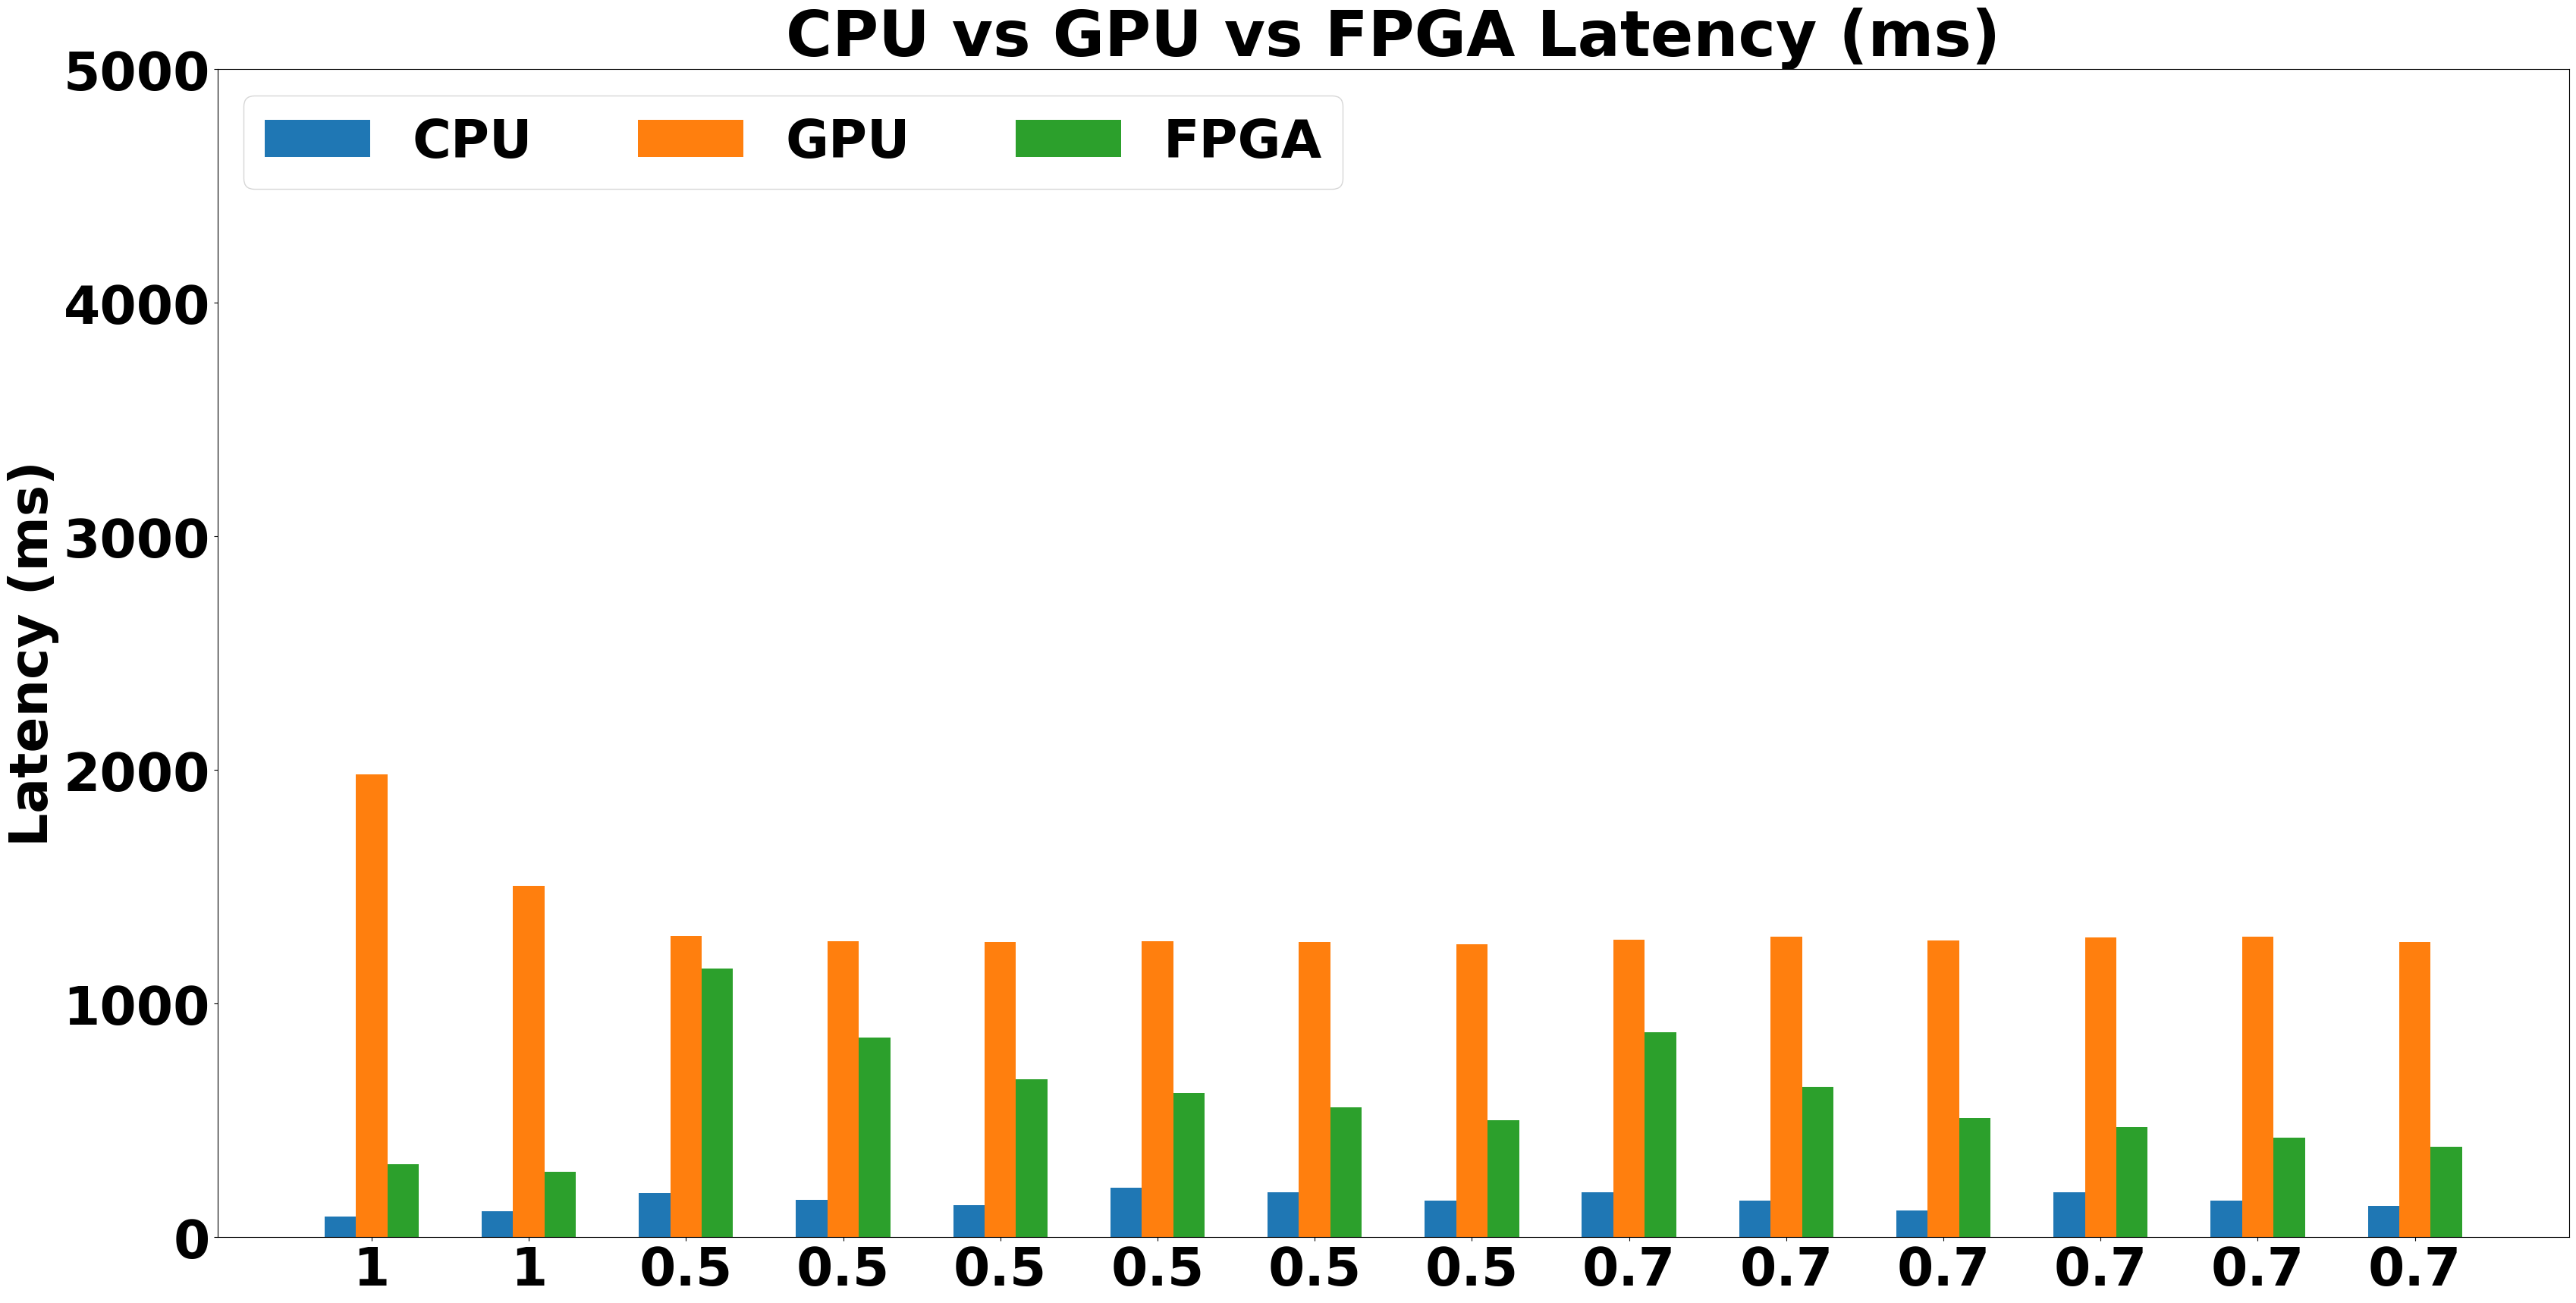

In [3]:
classifier = density
latencies = {
    'CPU': cpu_throughput,
    'GPU': gpu_throughput,
    'FPGA': fpga_throughput,
}

plt.rcParams.update({'font.size': 50, 'font.weight':'bold'})

x = np.arange(len(classifier))*2  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(40, 20))

for attribute, measurement in latencies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Latency (ms)', weight='bold')
ax.set_title('CPU vs GPU vs FPGA Latency (ms)', weight='bold')
ax.set_xticks(x + width, classifier, weight='bold')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 5000)
